In [1]:
# import the lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print('all lib imported')

all lib imported


In [2]:
# load the dataset
house_data=pd.read_csv('housing_data.csv',index_col=0)
house_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,SC60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,No,No,No,0,Feb,2008,WD,Normal,208500
1,SC20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,0,No,No,No,0,May,2007,WD,Normal,181500
2,SC60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,No,No,No,0,Sep,2008,WD,Normal,223500
3,SC70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,0,No,No,No,0,Feb,2006,WD,Abnorml,140000
4,SC60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0,No,No,No,0,Dec,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,SC60,RL,62.0,7917,Pave,None,Reg,Lvl,AllPub,Inside,...,0,No,No,No,0,Aug,2007,WD,Normal,175000
1456,SC20,RL,85.0,13175,Pave,None,Reg,Lvl,AllPub,Inside,...,0,No,MnPrv,No,0,Feb,2010,WD,Normal,210000
1457,SC70,RL,66.0,9042,Pave,None,Reg,Lvl,AllPub,Inside,...,0,No,GdPrv,Shed,2500,May,2010,WD,Normal,266500
1458,SC20,RL,68.0,9717,Pave,None,Reg,Lvl,AllPub,Inside,...,0,No,No,No,0,Apr,2010,WD,Normal,142125


In [3]:
house_data.shape

(1460, 80)

# visualization
1. Univariate Analysis
   1. Numerical var
   2. Categorical var
2. Bi-Variate Analysis
   1. Num vs Num
   2. Catgorical Vs Numerical
   3. Categorical vs Categorical
3. Multivarite Analysis
   More var together
    

In [4]:
# null values
house_data.isnull().sum()



MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 80, dtype: int64

In [5]:
# print only those col in which have missing col
house_data.isnull().sum()[house_data.isnull().sum()>0]

Electrical      1
GarageYrBlt    81
dtype: int64

In [6]:
# drop the missing values
house_data.dropna(inplace=True)

In [7]:
house_data.isnull().sum()[house_data.isnull().sum()>0]

Series([], dtype: int64)

In [8]:
house_data.shape


(1378, 80)

In [9]:
# dealing more col
# seprate the dataset
df_num=house_data.select_dtypes(exclude='object')
df_num.shape

(1378, 35)

In [10]:
# seprate the dataset
df_obj=house_data.select_dtypes(include='object')
df_obj.shape

(1378, 45)

# Univariate Analysis

In [11]:
df_num.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'YrSold', 'SalePrice'],
      dtype='object')

In [12]:
df_num

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,...,548,0,61,0,0,0,0,0,2008,208500
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,...,460,298,0,0,0,0,0,0,2007,181500
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,...,608,0,42,0,0,0,0,0,2008,223500
3,60.0,9550,7,5,1915,1970,0.0,216,0,540,...,642,0,35,272,0,0,0,0,2006,140000
4,84.0,14260,8,5,2000,2000,350.0,655,0,490,...,836,192,84,0,0,0,0,0,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,6,5,1999,2000,0.0,0,0,953,...,460,0,40,0,0,0,0,0,2007,175000
1456,85.0,13175,6,6,1978,1988,119.0,790,163,589,...,500,349,0,0,0,0,0,0,2010,210000
1457,66.0,9042,7,9,1941,2006,0.0,275,0,877,...,252,0,60,0,0,0,0,2500,2010,266500
1458,68.0,9717,5,6,1950,1996,0.0,49,1029,0,...,240,366,0,112,0,0,0,0,2010,142125


(array([105., 691., 367., 134.,  52.,  18.,   4.,   3.,   2.,   2.]),
 array([ 35311. , 107279.9, 179248.8, 251217.7, 323186.6, 395155.5,
        467124.4, 539093.3, 611062.2, 683031.1, 755000. ]),
 <BarContainer object of 10 artists>)

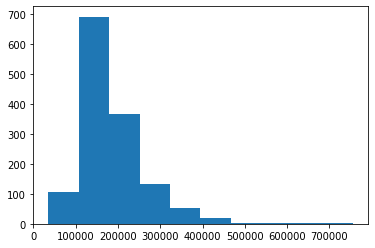

In [13]:
# create histogram
plt.hist(house_data['SalePrice'])

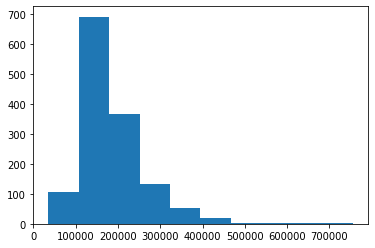

In [14]:
plt.hist(house_data['SalePrice'])
plt.show()

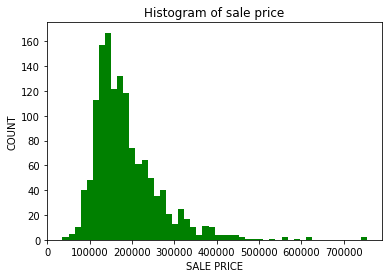

In [15]:
plt.hist(house_data['SalePrice'],bins=50,color='g')
plt.xlabel('SALE PRICE')
plt.ylabel('COUNT')
plt.title('Histogram of sale price')
plt.show()



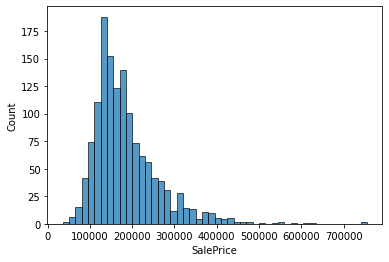

In [16]:
sns.histplot(house_data['SalePrice'])
plt.show()